# Project : 
## Predict if Passegers  Survived the Titanic Disaster or not, why and what to do to ensure the chance of such happening is extremely slim in the future.

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Fea">Feature Engineering/Data Preprocessing</a></li>
<li><a href="#mod">Modeling</a></li>
<li><a href="#modeva">Model Evaluation</a></li>
<li><a href="#hyp">HyperParameter Optimization</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Full Name : Odelola Solomon Oluwatobiloba

<a id='intro'></a>
## Introduction
The disaster happened on 15th of april 1912 where so many passengers died and few survived the incident. In this project i will be predicting if passengers survived and using so many analytical patterns to achieve the predictions, i will build a model to solve the problem

**Description of Each Variable**
- fare : Passengers tfare
- Pclass : Passengers class
- Embarked: Point of Embarkation (c= Cherbourg, Q= Queenstown, S=Southampton)
- Cabin: cabin
- Parch: Number of parents/children on board
- Ticket: Ticket Number
- Sibsp: Number of Siblings or Spouse on board

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
df=pd.read_csv('cleanedtitanic2.csv')

In [38]:
df.head(2)

,Unnamed: 0,Passenger_id,Survived,Passenger_class,Name,Sex,Age,Siblings_Spouse,Parents_Children,Ticket_Number,Passenger_Fare,Cabin,Embarked
0,1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,C23 C25 C27,S
1,2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C


In [40]:
df['Parents_Children'].unique()

array([0., 1., 2., 5., 3., 4., 6.])

<a id='Fea'></a>
## Feature Engineering/Data Preprocessing

In [4]:
df=df.drop(columns=['Unnamed: 0'], axis=1)

In [5]:
df.dtypes

Passenger_id          int64
Survived              int64
Passenger_class       int64
Name                 object
Sex                  object
Age                 float64
Siblings_Spouse     float64
Parents_Children    float64
Ticket_Number        object
Passenger_Fare      float64
Cabin                object
Embarked             object
dtype: object

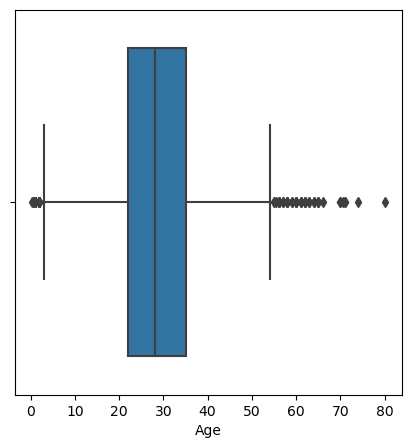

In [6]:
#check for outliers

plt.figure(figsize=[5,5])
sns.boxplot(data=df, x='Age');

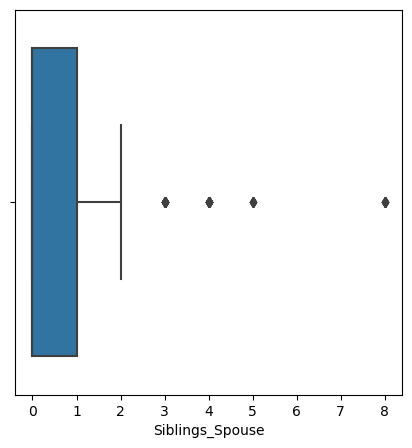

In [7]:
plt.figure(figsize=[5,5])
sns.boxplot(data=df, x='Siblings_Spouse');

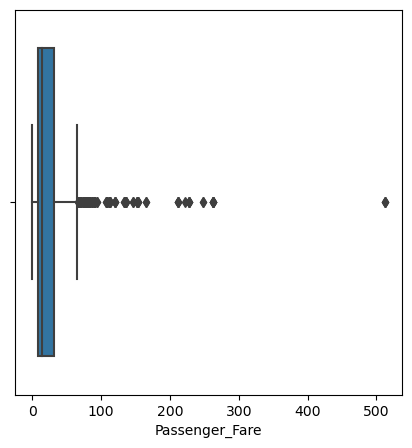

In [8]:
plt.figure(figsize=[5,5])
sns.boxplot(data=df, x='Passenger_Fare');

In [9]:
Q1 = df.quantile(.25, axis=0)
print('first quartile',Q1)

first quartile Passenger_id        223.5000
Survived              0.0000
Passenger_class       2.0000
Age                  22.0000
Siblings_Spouse       0.0000
Parents_Children      0.0000
Passenger_Fare        7.9104
Name: 0.25, dtype: float64


In [10]:
Q3 = df.quantile(.75, axis=0)
print('first quartile',Q3)

first quartile Passenger_id        668.5
Survived              1.0
Passenger_class       3.0
Age                  35.0
Siblings_Spouse       1.0
Parents_Children      0.0
Passenger_Fare       31.0
Name: 0.75, dtype: float64


In [11]:
IQR= Q3-Q1
IQR

Passenger_id        445.0000
Survived              1.0000
Passenger_class       1.0000
Age                  13.0000
Siblings_Spouse       1.0000
Parents_Children      0.0000
Passenger_Fare       23.0896
dtype: float64

In [12]:
df_outliers=df[((df < (Q1-1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_outliers.head(2)

C:\Users\512GB\AppData\Local\Temp\ipykernel_9232\3176936886.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_outliers=df[((df < (Q1-1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


,Passenger_id,Survived,Passenger_class,Name,Sex,Age,Siblings_Spouse,Parents_Children,Ticket_Number,Passenger_Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3.0,1.0,349909,21.0750,C23 C25 C27,S


In [13]:
a=df.shape
a

(891, 12)

In [14]:
b=df_outliers.shape

In [15]:
a[0]-b[0]

577

In [16]:
#filter off the outliers
data=df[-((df < (Q1-1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\512GB\AppData\Local\Temp\ipykernel_9232\2424663518.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data=df[-((df < (Q1-1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [17]:
data.shape

(577, 12)

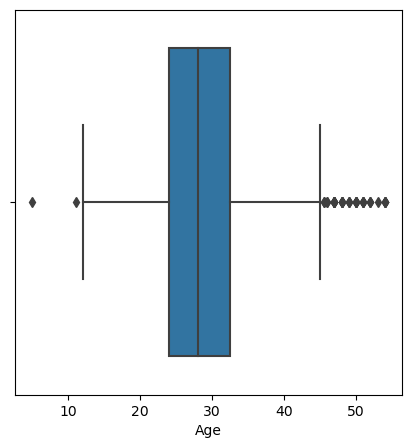

In [18]:
#check for outliers

plt.figure(figsize=[5,5])
sns.boxplot(data=data, x='Age');

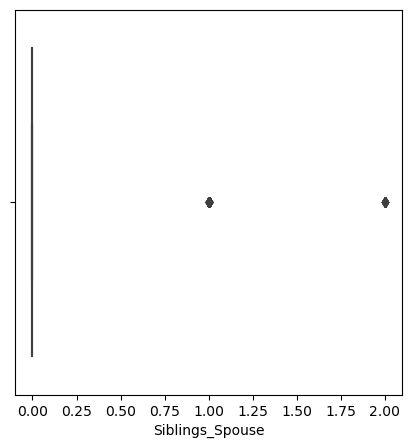

In [19]:
plt.figure(figsize=[5,5])
sns.boxplot(data=data, x='Siblings_Spouse');

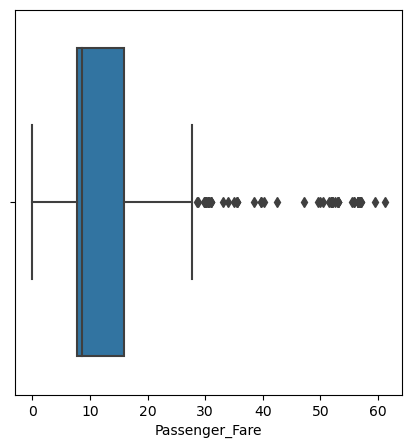

In [20]:
plt.figure(figsize=[5,5])
sns.boxplot(data=data, x='Passenger_Fare');

In [21]:
#convert the data types accordingly
data['Survived']=data['Survived'].astype('category')

C:\Users\512GB\AppData\Local\Temp\ipykernel_9232\2358945670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Survived']=data['Survived'].astype('category')


In [22]:
data['Passenger_class']=data['Passenger_class'].astype('category')
data['Sex']=data['Sex'].astype('category')
data['Embarked']=data['Embarked'].astype('category')

C:\Users\512GB\AppData\Local\Temp\ipykernel_9232\2166688282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Passenger_class']=data['Passenger_class'].astype('category')
C:\Users\512GB\AppData\Local\Temp\ipykernel_9232\2166688282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex']=data['Sex'].astype('category')
C:\Users\512GB\AppData\Local\Temp\ipykernel_9232\2166688282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [23]:
data['Parents_Children']=data['Parents_Children'].astype('int64')

C:\Users\512GB\AppData\Local\Temp\ipykernel_9232\471137714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Parents_Children']=data['Parents_Children'].astype('int64')


In [24]:
#check
data.dtypes

Passenger_id           int64
Survived            category
Passenger_class     category
Name                  object
Sex                 category
Age                  float64
Siblings_Spouse      float64
Parents_Children       int64
Ticket_Number         object
Passenger_Fare       float64
Cabin                 object
Embarked            category
dtype: object

In [25]:
#drop some columns that will not obviously have impact on the model
data=data.drop(columns=['Passenger_id','Name','Ticket_Number','Cabin'],axis=1)

In [26]:
data.head(3)

,Survived,Passenger_class,Sex,Age,Siblings_Spouse,Parents_Children,Passenger_Fare,Embarked
0,0,3,male,22.0,1.0,0,7.250,S
2,1,3,female,26.0,0.0,0,7.925,S
3,1,1,female,35.0,1.0,0,53.100,S


In [27]:
#perform encoding
dummies=pd.get_dummies(data[['Passenger_class','Sex','Embarked']])

In [28]:
dummies.head(2)

,Passenger_class_1,Passenger_class_2,Passenger_class_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
2,0,0,1,1,0,0,0,1


In [29]:
#join the dummy and real data 
df=pd.concat([data, dummies], axis=1)

In [30]:
df.head(2)

,Survived,Passenger_class,Sex,Age,Siblings_Spouse,Parents_Children,Passenger_Fare,Embarked,Passenger_class_1,Passenger_class_2,Passenger_class_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1.0,0,7.250,S,0,0,1,0,1,0,0,1
2,1,3,female,26.0,0.0,0,7.925,S,0,0,1,1,0,0,0,1


In [31]:
#drop the columns dummied
df=df.drop(columns=['Sex','Passenger_class','Embarked'], axis=1)

In [32]:
#resacle the data
features=df.drop(columns=['Survived'],axis=1)
response=df['Survived']

In [33]:
#display the newly scaled data
features

,Age,Siblings_Spouse,Parents_Children,Passenger_Fare,Passenger_class_1,Passenger_class_2,Passenger_class_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1.0,0,7.2500,0,0,1,0,1,0,0,1
2,26.0,0.0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1.0,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0.0,0,8.0500,0,0,1,0,1,0,0,1
5,28.0,0.0,0,8.4583,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
884,25.0,0.0,0,7.0500,0,0,1,0,1,0,0,1
886,27.0,0.0,0,13.0000,0,1,0,0,1,0,0,1
887,19.0,0.0,0,30.0000,1,0,0,1,0,0,0,1
889,26.0,0.0,0,30.0000,1,0,0,0,1,1,0,0


In [34]:
#rescale or normalize the features
features= (features - features.mean())/features.std()

In [35]:
features.head()

,Age,Siblings_Spouse,Parents_Children,Passenger_Fare,Passenger_class_1,Passenger_class_2,Passenger_class_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.854020,1.799174,NaN,-0.608919,-0.409542,-0.514676,0.738897,-0.573517,0.573517,-0.400858,-0.352902,0.576183
2,-0.386275,-0.447846,NaN,-0.555376,-0.409542,-0.514676,0.738897,1.740605,-1.740605,-0.400858,-0.352902,0.576183
3,0.666152,1.799174,NaN,3.028087,2.437518,-0.514676,-1.351023,1.740605,-1.740605,-0.400858,-0.352902,0.576183
4,0.666152,-0.447846,NaN,-0.545460,-0.409542,-0.514676,0.738897,-0.573517,0.573517,-0.400858,-0.352902,0.576183
5,-0.152402,-0.447846,NaN,-0.513072,-0.409542,-0.514676,0.738897,-0.573517,0.573517,-0.400858,2.828733,-1.732551


In [36]:
features['Parents_Children'].unique()

array([nan])

In [41]:
#drop the Parents_Children column
features=features.drop(columns=['Parents_Children'], axis=1)

In [42]:
#check if data has been standardized
print(features.mean(), features.std())

Age                 -1.144857e-16
Siblings_Spouse     -7.194322e-16
Passenger_Fare      -9.505202e-16
Passenger_class_1    4.086852e-16
Passenger_class_2    1.296864e-16
Passenger_class_3    1.421932e-16
Sex_female           3.952163e-16
Sex_male            -3.890591e-16
Embarked_C          -8.254518e-17
Embarked_Q           2.409011e-16
Embarked_S           1.954916e-16
dtype: float64 Age                  1.0
Siblings_Spouse      1.0
Passenger_Fare       1.0
Passenger_class_1    1.0
Passenger_class_2    1.0
Passenger_class_3    1.0
Sex_female           1.0
Sex_male             1.0
Embarked_C           1.0
Embarked_Q           1.0
Embarked_S           1.0
dtype: float64


<a id='mod'></a>
## Modeling